# Feature selection

f1 f2 f3 f4 ..........f50
15 relevant features u have to select from total 50 features
Feature selection is used to do this task.
bcz it will select only relevant features
wehereas irrelevant , noisy features will not be selected.

In [1]:
#feature selection
# feature selection we select most important features
# Supervised learning algorithms
#filter method
# wrapper method
# feature imporatance method

In [2]:
# why feature selection is imporatant

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
df = pd.read_csv('mobile_data.csv.csv')

In [5]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [10]:
x = df.iloc[:,:-1]

In [11]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [12]:
y = df['price_range']

# information gain

### mutual_info_classif : Mutual information for a discrete target.

Entropy- entropy is the machine learning metric that measures the unpredictability or impurity in the system.

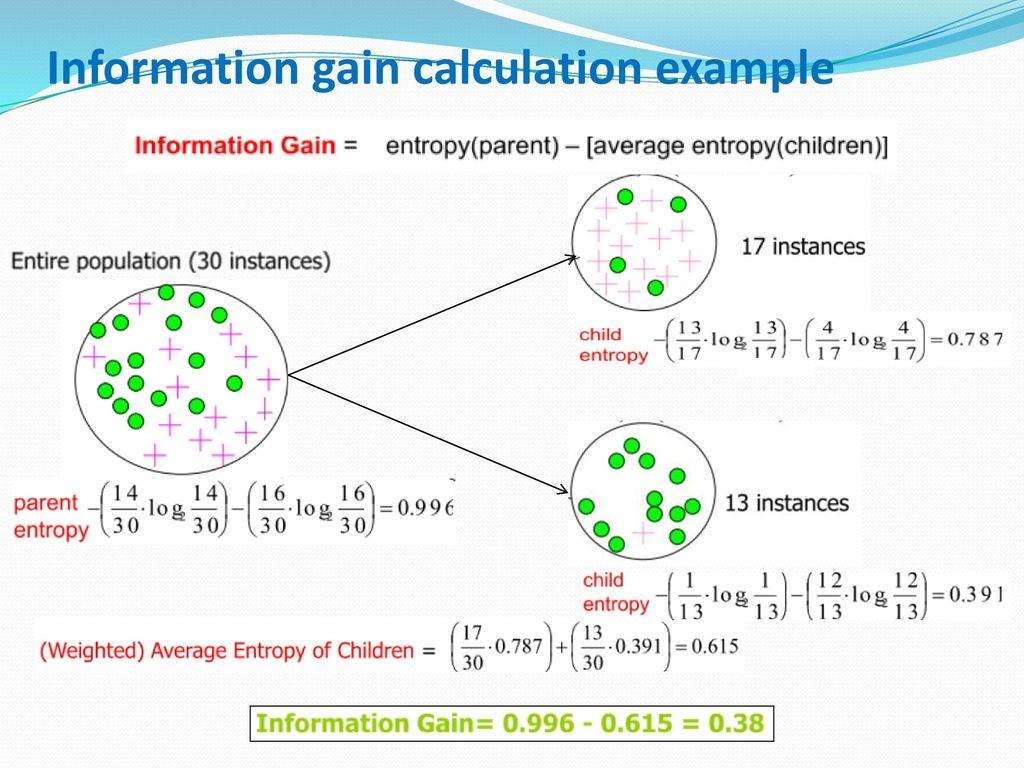
plt.show()

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
model = mutual_info_classif(x,y)

In [15]:
len(model)

20

In [16]:
model

array([0.02789898, 0.01130478, 0.        , 0.        , 0.        ,
       0.        , 0.00143474, 0.        , 0.00584917, 0.00780375,
       0.01101864, 0.0233656 , 0.02893021, 0.84749188, 0.        ,
       0.01013664, 0.        , 0.0257812 , 0.        , 0.        ])

In [17]:
imp_fea = pd.DataFrame(model,columns=['scores'])

In [18]:
imp_fea

,scores
0,0.027899
1,0.011305
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.001435
7,0.000000
8,0.005849
9,0.007804


In [19]:
df_columns = pd.DataFrame(df.columns)
df_columns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [20]:
new_feat = pd.concat([imp_fea,df_columns],axis = 1)

In [21]:
new_feat

,scores,0
0,0.027899,battery_power
1,0.011305,blue
2,0.000000,clock_speed
3,0.000000,dual_sim
4,0.000000,fc
5,0.000000,four_g
6,0.001435,int_memory
7,0.000000,m_dep
8,0.005849,mobile_wt
9,0.007804,n_cores


In [22]:
# lets select only 10 columns outof 20 using nlargest and specify column name to sort
new_feat.nlargest(10,'scores')

,scores,0
13,0.847492,ram
12,0.028930,px_width
0,0.027899,battery_power
17,0.025781,three_g
11,0.023366,px_height
1,0.011305,blue
10,0.011019,pc
15,0.010137,sc_w
9,0.007804,n_cores
8,0.005849,mobile_wt


# select k best

f_classif : ANOVA F-value between label/feature for classification tasks.


chi2 : Chi-squared stats of non-negative features for classification tasks.

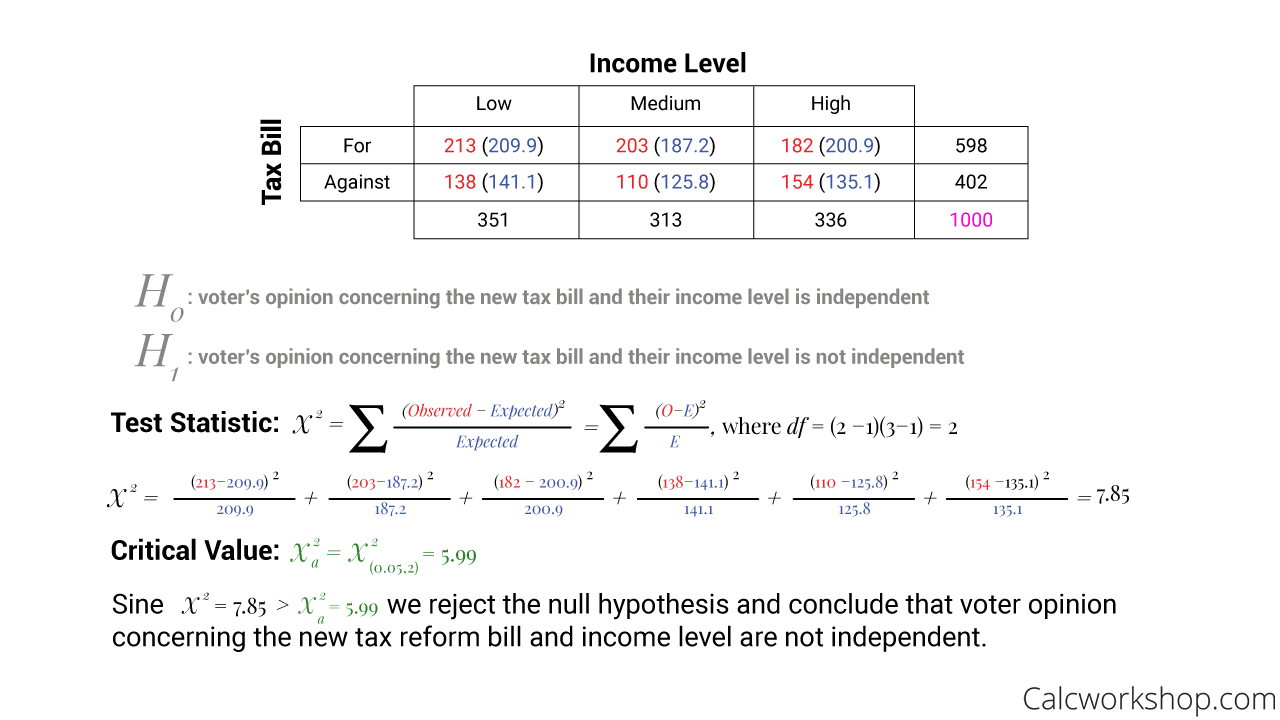
plt.show()


In [23]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import f_classif
#from sklearn.feature_selection import chi2

In [24]:
feat_imp = SelectKBest(score_func=f_classif,k = 10)
#feat_imp = SelectKBest(score_func=chi2,k = 10)

In [25]:
feat_imp.fit(x,y)

SelectKBest()

In [26]:
feat_imp.scores_

array([3.15981575e+01, 4.76767709e-01, 4.93707801e-01, 4.28239286e-01,
       7.72181960e-01, 1.05952453e+00, 2.92299608e+00, 1.50068244e+00,
       3.59431819e+00, 2.62541515e+00, 8.25446358e-01, 1.94848418e+01,
       2.26208825e+01, 3.52011082e+03, 2.22598374e+00, 1.67099983e+00,
       1.62881131e+00, 4.57319750e-01, 1.29330223e+00, 2.84940470e-01])

In [27]:
df_imp = pd.DataFrame(feat_imp.scores_,columns=['scores'])

In [28]:
df1 = pd.concat([df_imp,df_columns],axis=1)

In [29]:
df1

,scores,0
0,31.598158,battery_power
1,0.476768,blue
2,0.493708,clock_speed
3,0.428239,dual_sim
4,0.772182,fc
5,1.059525,four_g
6,2.922996,int_memory
7,1.500682,m_dep
8,3.594318,mobile_wt
9,2.625415,n_cores


In [30]:
df1.nlargest(10,'scores')

,scores,0
13,3520.110824,ram
0,31.598158,battery_power
12,22.620882,px_width
11,19.484842,px_height
8,3.594318,mobile_wt
6,2.922996,int_memory
9,2.625415,n_cores
14,2.225984,sc_h
15,1.671000,sc_w
16,1.628811,talk_time


# correlation coef

In [31]:
df[:3]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [32]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

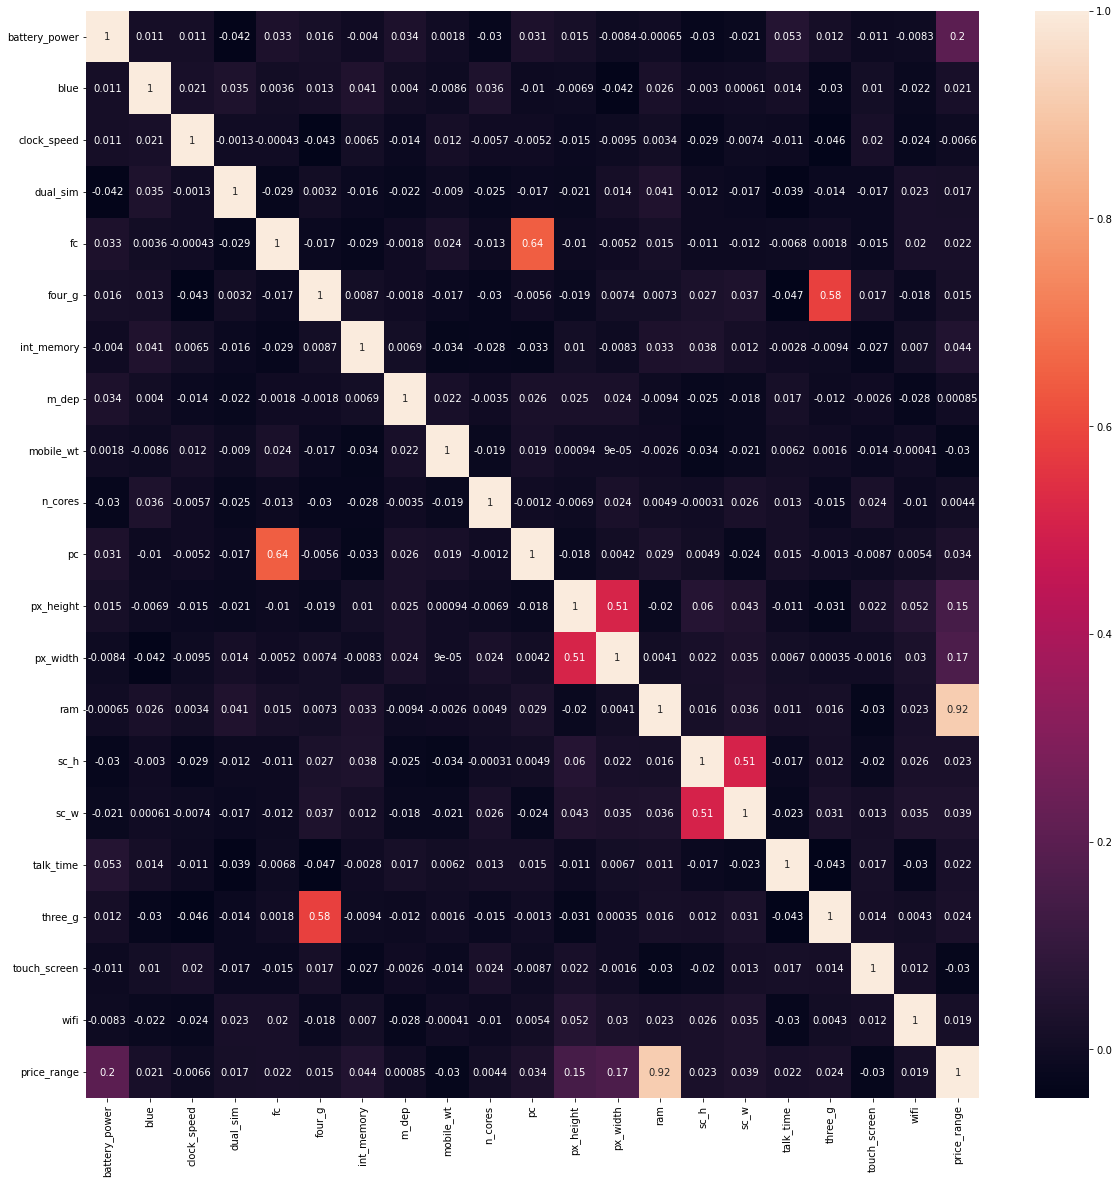

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# feature importance

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
modl = ExtraTreesClassifier()

In [36]:
modl.fit(x,y)

ExtraTreesClassifier()

In [37]:
modl.feature_importances_

array([0.06112547, 0.02078059, 0.03348297, 0.01987165, 0.03340589,
       0.01824534, 0.03602343, 0.03415984, 0.03705823, 0.03377699,
       0.03478986, 0.04587994, 0.04859968, 0.38143363, 0.03485854,
       0.03382907, 0.03636112, 0.01526657, 0.01972048, 0.02133072])

In [38]:
ranked_features = pd.Series(modl.feature_importances_,index=x.columns)

<AxesSubplot:>

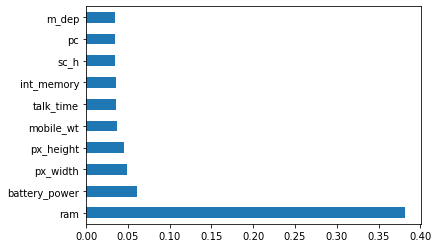

In [39]:
ranked_features.nlargest(10).plot(kind='barh')